# Lab Work 2: Text Processing: Preparation of texts

Use this notebook for the subsequence excecise's parts.

**Please note, that you can only pass the intial checking, if you write Markdown documention about your findings (not code documentation). Any submission that does not adhere to that will lead to an immediate fail, without the chance of resubmission!**

## 6.2.1 Load the data and CountVectorize them
You will find a list of files in Ilias [sherlock.zip](https://www.ili.fh-aachen.de/goto_elearning_file_815003_download.html)
Download the zip file and adapt your next line accordingly.

In [255]:
import numpy as np
import pandas as pd

filenames = [r"./Sherlock.txt", 
             r"./Sherlock_blanched.txt",
             r"./Sherlock_black.txt",
             r"./Sherlock_blue.txt",
             r"./Sherlock_card.txt"]

Now we create a count Vectorizer. The parameter given tells the CountVectorizer that its methods shall operate on a list of filenames.

In [256]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(input="filename")

Now generate the Bag of Words with the CountVectorizer and check:
* the total number of different words
* the total number of words per document
* the total number of occurences of each word

In [257]:
# create the bag of words matrix
bag_of_words = vectorizer.fit_transform(filenames)

# count the total number of unique words in all documents, which corresponds to amount of columns in the matrix
total_unique_words = len(vectorizer.get_feature_names_out())

# count the total number of words in each document
words_per_document = bag_of_words.sum(axis=1)
words_per_doc_flat = np.asarray(words_per_document).flatten()

# count the total number of each word in all documents
word_counts = bag_of_words.sum(axis=0)
word_counts_flat = np.asarray(word_counts).flatten()

print(f"Total number of different words: {total_unique_words}")
print()

print(f"{'Document-Name':<30} {'Word count'}")
print("-" * 45)
for filename, count in zip(filenames, words_per_doc_flat):
    print(f"{filename:<30} {count}")
print()

print(f"{'Word':<30} {'Count'}")
print("-" * 45)
for word, count in list(zip(feature_names, word_counts_flat)):
    print(f"{word:<30} {count}")


Total number of different words: 8879

Document-Name                  Word count
---------------------------------------------
./Sherlock.txt                 107416
./Sherlock_blanched.txt        7258
./Sherlock_black.txt           7775
./Sherlock_blue.txt            7497
./Sherlock_card.txt            8242

Word                           Count
---------------------------------------------
1883                           2
1884                           1
1901                           1
30                             1
45                             2
46                             1
83                             1
95                             1
aback                          2
abandon                        1
abbey                          1
able                           1
abnormally                     10
abrasion                       3
abroad                         1
absconding                     1
absence                        1
absent                         1
absolute    

### > Dokumenatation <
Es werden über alle Dokumente hinweg alle einzigartigen Features, in diesem Fall die unterschiedlichen Wörter gezählt. Dies gibt uns die `bag_of_words`.

Der Aufbau der Matrix ist wie folgt
```
            -> axis 1
V - axis 0 - V

|      | Wort1 | Wort2 | Wort3 | ... |
|------|-------|-------|-------|-----|
| Dok1 |       |       |       |     |
| Dok2 |       |       |       |     |
| ...  |       |       |       |     |
```

#### Gesamtzahl der (einzigartigen) Wörter
Die Anzahl der Spalten gibt uns die Anzahl der Wörter über alle Texte hinweg, da jede Spalte ein Wort darstellt, d.h. ein Wort wird nicht doppelt gelistet werden.
So erhalten wir eine Anzahl von **8879** Wörtern, die in den Texten vorkommen.
#### Anzahl der Wörter pro Dokument
Durch das Aufsummieren der Werte in einer Zeile, ermitelt man die Anzahl aller Wörter in einem Dokument. Die Ausgabe ist nach der Reihenfolge der Dokumentennamen im Array `filenames` sortiert.

|                   | Anzahl der Wörter |
|-------------------|-------------------|
| Sherlock          | 107416            |
| Sherlock_blanched | 7258              |
| Sherlock_black    | 7775              |
| Sherlock_blue     | 7497              |
| Sherlock_card     | 8242              |

#### Vorkommen jedes Wortes
Durch das Aufsummieren der Werte in einer Spalte, ermitelt man die Häufigkeit eines Wörter in allen Dokumenten. Die Ausgabe ist alphabetisch, da `bag_of_words` beim Erzeugen durch `vercotorizer` alphabetisch sortiert wird.
Da die Liste sehr lang ist, hier ein Auszug

| Word      | count |
|-----------|-------|
| all       | 462   |
| allardyce | 2     |
| alley     | 1     |
| allow     | 8     |
| allowance | 2     |
| allowed   | 10    |
| allowing  | 2     |
| allows    | 2     |
| allude    | 4     |

## 6.2.2 Which word is occuring the most?

This must be done in three steps. Reason is, that the vectorizer.vocabulary_ is organized as a dictonary with the value indicating the position of the word in the array
1. Find out the highest count of a word
2. Find out the position of this count
3. Find out the word at this position

In [258]:
# find the highest count
count_max = np.max(word_counts)

# find the index of the highest count
count_max_index = np.argmax(word_counts)

# get the word with the highest count
feature_names = vectorizer.get_feature_names_out()
count_max_word = feature_names[count_max_index]

print(f"Häufigstes Wort: '{count_max_word}'")
print(f"Anzahl: {count_max}")
print(f"Index: {count_max_index}")


Häufigstes Wort: 'the'
Anzahl: 7975
Index: 7921


#### > Dokumentation <
Das Wort, was am häufigsten vorkommt, ist "the" an der Stelle 7921 in der Liste `word_counts` mit einer Häufigkeit von 7975, was nicht verwunderlich ist, da es sich um englische Texte handelt. Alles andere wäre bei der Textgröße ungewöhnlich und würde darauf deuten, dass es sich nicht um einen Text mit der für Englisch typischen Wortverteilung handelt.

# 6.3 Improving using stop word, ngrams and tf-idf
The feature space is vast with nearly 9000 dimensions. Hence we should try to reduce the number of dimensions by:

1. use only words that have a mimimum occurence in all documents (minimal document frequency) min_df
2. remove stop words (like 'a', 'and', 'the') as they don't give valuable information for classification and/or 
3. remove words that occur in many documents (maximum document frequency) max_df 

Experiment with the values of min_df and max_df and see how the size of the vocabulary is changing.

Implement all three options and check for their separate outcome an their combinations

In [259]:
def improver(_stop_words=None, _min_df=1, _max_df=len(filenames)):
    vectorizer = CountVectorizer(input="filename", stop_words=_stop_words, min_df=_min_df, max_df=_max_df)
    bag_of_words = vectorizer.fit_transform(filenames)
    total_unique_words = len(vectorizer.get_feature_names_out())
    print(f"unique words: {total_unique_words:<4}  min_df: {_min_df}, max_df: {_max_df}, stop_words: {_stop_words}")
    return bag_of_words, vectorizer

print("only max_df")
for i in range(1,6):
    improver(_max_df=i)

print("\nonly max_df")
for i in range(1,6):
    improver(_min_df=i)

print("\nonly stop_words")
improver(_stop_words=["the"])
improver(_stop_words=["and"])
improver(_stop_words=["a"])
improver(_stop_words=["I"])
improver(_stop_words=["i"])
improver(_stop_words=["the", "and", "a"])
improver(_stop_words="english")

print("\ncombination")
bag_of_words, vectorizer_combined = improver(_stop_words="english", _min_df=2, _max_df=4)




only max_df
unique words: 5508  min_df: 1, max_df: 1, stop_words: None
unique words: 7349  min_df: 1, max_df: 2, stop_words: None
unique words: 8079  min_df: 1, max_df: 3, stop_words: None
unique words: 8455  min_df: 1, max_df: 4, stop_words: None
unique words: 8879  min_df: 1, max_df: 5, stop_words: None

only max_df
unique words: 8879  min_df: 1, max_df: 5, stop_words: None
unique words: 3371  min_df: 2, max_df: 5, stop_words: None
unique words: 1530  min_df: 3, max_df: 5, stop_words: None
unique words: 800   min_df: 4, max_df: 5, stop_words: None
unique words: 424   min_df: 5, max_df: 5, stop_words: None

only stop_words
unique words: 8878  min_df: 1, max_df: 5, stop_words: ['the']
unique words: 8878  min_df: 1, max_df: 5, stop_words: ['and']
unique words: 8879  min_df: 1, max_df: 5, stop_words: ['a']
unique words: 8879  min_df: 1, max_df: 5, stop_words: ['I']
unique words: 8879  min_df: 1, max_df: 5, stop_words: ['i']
unique words: 8877  min_df: 1, max_df: 5, stop_words: ['the', 'a

### > Dokumentation <
#### min_df und max_df
Wenn man min_df und max_df isoliert laufen lässt, so erhält man folgenden Werte für Gesamtzahl der Wörter
| wert | min_df(wert) | max_df(wert) |
|------|--------------|--------------|
| 1    | 8879         | 5508         |
| 2    | 3371         | 7349         |
| 3    | 1530         | 8079         |
| 4    | 800          | 8455         |
| 5    | 424          | 8879         |


Man kann klar erkennen, dass
- min_df schon beim Wert 2 mehr als die Hälfte aller ursprünglichen Wörter entfernt, da es sich dabei um Wörter handelt die nur in einem Dokument vorkommen und somit auch ein einziges Mal über alle Dokumente hinweg vorkommen
- mit max_df eine merkliche Reduktion erst bei einem Wert von 3 bzw. 2 auftritt. Beim Wert 1 haben wir dann nur noch Wörter die nur noch in einem Dokument vorkommen.

Eine wichtige Beobachtung
```
min_df(2) + max_df(1) = 8879
3371 + 5508 = 8879
```

Man kann also allgemein sagen, dass gilt
```
min_df(n+1) + max_df(n) = initial_total_unique_words
```

#### stop_words
Wenn man stop_words isoliert laufen lässt, so erhält man folgenden Werte für Gesamtzahl der Wörter

| wert        | stop_words(wert) |
|-------------|------------------|
| the         | 8878             |
| and         | 8878             |
| a           | 8879             |
| i           | 8879             |
| I           | 8879             |
| the, and, a | 8877             |
| english     | 8601             |

Man kann erkennen,dass wenn man einzlne Wörter übergibt, auch je ein Wort entfernt wird.

Eine wichtige Beobachtung
das Wort "a" und andere Wörter im Englischen die nur aus einem Buchstaben bestehen, scheinen keine Auswirkungen zuhaben, was mich darauf schließen lässt, dass eine Mindestwortlänge von 2 Buchstaben erforderlich ist
> aus der Doku der Fkt: If 'english', a built-in stop word list for English is used.

### Kombination

Man entfernt die häufigsten Wörter der englischen Sprache mit `stop_words="english"`, die seltensten Wörter mit `min_df=2` und die häufigsten Wörter mit `max_df=4` ohne dabei zu sehr zu entfernen

unique words: 2856  min_df: 2, max_df: 4, stop_words: english

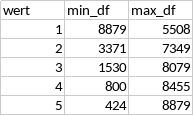

# 6.4 Rescaling the data using term frequency inverse document frequency
Here, term frequency is the number of occurences of a term (word) $t$ in a document $d$. 

$\operatorname{tf}(t, d) = f_{t, d}$ 

Sometimes tf gets normalized to the length of $d$
The inverse document frequency idf is a measure on the amount of information a term t carries. Rare occurences of t leads to a high amount of information common occurence to a low amount of information. The idf is computed as 

$\text{idf}(t) = \log{\frac{1 + n}{1+\text{df}(t)}} + 1$

where $n$ is the total number of documents and $\text{df}(t)$ is the number of documents that contain the term $t$. Hence, the tf-idf is the product of the two terms:

$\text{tf-idf(t,d)}=\text{tf(t,d)} \cdot \text{idf(t)}$

scikit-learn supports this in the `TfidfTransformer`, when using the following parameters: `TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)`. Refer to the scikit documentation for the parameter sets and how this changes the formula.

Combining Bag of Words and tf-idf can be done using the `TfidfVectorizer`

In [260]:
from sklearn.feature_extraction.text import TfidfTransformer

# initialize Transfoerms with given params
tfidf_transformer = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)

# 2. Anwenden auf die bestehende Bag-of-Words Matrix aus Aufgabe 6.3
tfidf_matrix = tfidf_transformer.fit_transform(bag_of_words)

# check results
print("Transformation abgeschlossen.")
print(f"Shape der TF-IDF Matrix: {tfidf_matrix.shape}")
print(f"{tfidf_matrix}")

Transformation abgeschlossen.
Shape der TF-IDF Matrix: (5, 2856)
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7104 stored elements and shape (5, 2856)>
  Coords	Values
  (0, 0)	0.009933797940553895
  (0, 1)	0.003973519176221558
  (0, 2)	0.001986759588110779
  (0, 3)	0.004947569788408338
  (0, 4)	0.001986759588110779
  (0, 5)	0.001986759588110779
  (0, 6)	0.001986759588110779
  (0, 7)	0.009933797940553895
  (0, 8)	0.003973519176221558
  (0, 9)	0.011920557528664675
  (0, 10)	0.01986759588110779
  (0, 11)	0.048557269601616326
  (0, 12)	0.001986759588110779
  (0, 13)	0.001986759588110779
  (0, 14)	0.005960278764332337
  (0, 15)	0.001986759588110779
  (0, 16)	0.015894076704886233
  (0, 17)	0.013907317116775453
  (0, 18)	0.02308865901257225
  (0, 19)	0.01803555728060035
  (0, 20)	0.009895139576816677
  (0, 21)	0.003973519176221558
  (0, 22)	0.005960278764332337
  (0, 23)	0.001986759588110779
  (0, 24)	0.01788083629299701
  :	:
  (4, 2801)	0.01587505840558671
  (4, 2802)	0.01

# 6.4.1 Find maximum value for each of the features over dataset

In [261]:
# 1. Das Maximum für jedes Feature über den Datensatz finden
# axis=0 bedeutet: Wir suchen vertikal über alle Dokumente hinweg
max_tfidf_values = tfidf_matrix.max(axis=0)

# Da sparse matrizen oft eine Matrix zurückgeben, machen wir es zu einem flachen Array
# toarray() wandelt sparse in dense um, flatten() macht eine 1D-Liste daraus
max_val_array = max_tfidf_values.toarray().flatten()

# 2. Verbindung mit den Wörtern herstellen
feature_names = vectorizer_combined.get_feature_names_out()

# Wir erstellen einen DataFrame für eine schöne Übersicht
df_tfidf_max = pd.DataFrame({
    'Word': feature_names,
    'Max_TFIDF': max_val_array
})

# 3. Sortieren, um die interessantesten Wörter oben zu haben
# Absteigend sortieren (höchste Werte zuerst)
df_sorted = df_tfidf_max.sort_values(by='Max_TFIDF', ascending=False)

# Ausgabe der Top 10 Wörter mit dem höchsten TF-IDF Score überhaupt
print("Wörter mit dem höchsten TF-IDF Score in einem Dokument:")
print(df_sorted)

Wörter mit dem höchsten TF-IDF Score in einem Dokument:
            Word  Max_TFIDF
1076     godfrey   0.533000
1200     hopkins   0.442111
260         bird   0.374464
1449    lestrade   0.365126
1790       peter   0.358469
...          ...        ...
192      avoided   0.011631
1275  indication   0.011631
242       belief   0.011631
1343        iron   0.011631
1118       habit   0.011631

[2856 rows x 2 columns]


Die Analyse der maximalen TF-IDF-Werte pro Feature zeigt deutlich
- Diskriminierende Features: An der Spitze der Liste stehen Begriffe wie "godfrey", "hopkins" oder "bird" mit hohen Scores (ca. 0.37 bis 0.53). Diese Wörter sind stark charakteristisch für einzelne Geschichten (z.B. Godfrey Emsworth in The Blanched Soldier). Sie ermöglichen einem Algorithmus eine eindeutige Zuordnung des Textes.
- Gemeinsame Features: Am unteren Ende der Liste finden sich Wörter mit sehr niedrigen Scores (ca. 0.01). Diese kommen diffus in fast allen Dokumenten vor und tragen kaum zur Unterscheidung bei.